In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

In [2]:
train_df = pd.read_csv(os.path.join('data', 'train.csv'))
train_df = train_df.set_index('id')
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [3]:
for col in train_df:
    if train_df[col].dtype == 'object':
        print(col, ": \t", set(train_df[col].values.tolist()))

gender : 	 {'Other', 'Female', 'Male'}
ever_married : 	 {'Yes', 'No'}
work_type : 	 {'Private', 'children', 'Never_worked', 'Self-employed', 'Govt_job'}
Residence_type : 	 {'Urban', 'Rural'}
smoking_status : 	 {'smokes', 'never smoked', 'Unknown', 'formerly smoked'}


In [4]:
def categorize(original_df):
    df = original_df.copy()
    
    """
    df['gender'] = original_df.gender.replace({'Female': -1., 'Other': 0., 'Male': 1.})
    df['ever_married'] = original_df.ever_married.replace({'No': -1., 'Yes': 1.})
    df['work_type'] = original_df.work_type.replace({'Private': 1., 'Self-employed': 2., 'children': 3., 'Govt_job': 4., 'Never_worked': 5.})
    df['Residence_type'] = original_df.Residence_type.replace({'Urban': -1., 'Rural': 1.})
    df['smoking_status'] = original_df.Residence_type.replace({'never smoked': 0, 'Unknown': 1., 'smokes': 3., 'formerly smoked': 2.})
    """
    
    for col in df:
        if df[col].dtype == 'object':
            df[col] = df[col].astype("category")
    
    return df

In [5]:
df = categorize(train_df)

<AxesSubplot:>

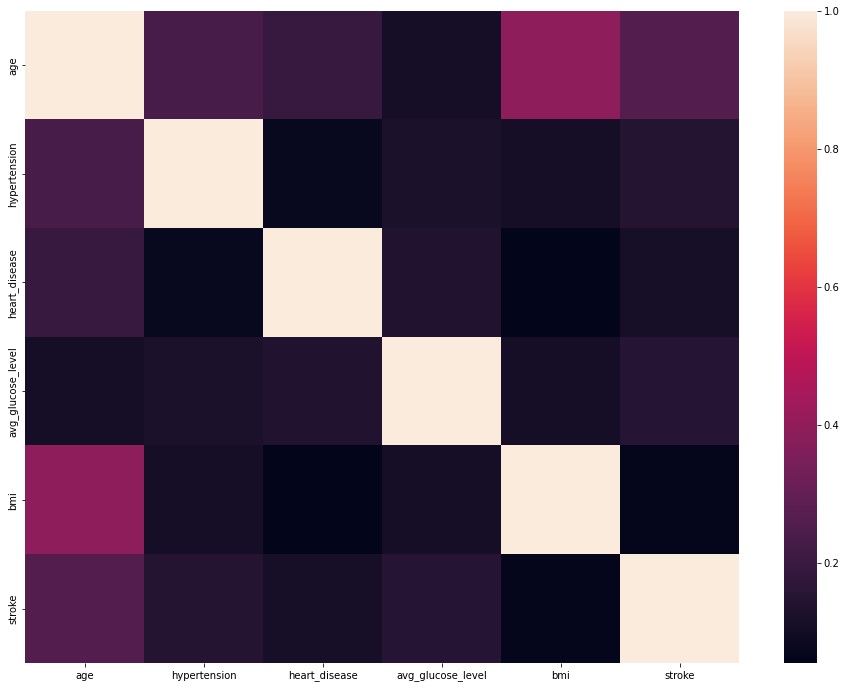

In [6]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = False)

In [7]:
y_train = df.stroke
X_train = df.drop(columns=['stroke'])

In [8]:
# create model instance
bst = XGBClassifier(tree_method="hist", enable_categorical=True)
# fit model
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [9]:
test_df = pd.read_csv(os.path.join('data', 'test.csv'))
test_df = test_df.set_index('id')

X_test = categorize(test_df)

In [10]:
# make predictions
preds = bst.predict(X_test)

In [11]:
def generate_submission(df, predictions):
    df['stroke'] = predictions
    df_out = df['stroke']
    df_out.to_csv(os.path.join('data', 'submission.csv'), index=True)

In [12]:
generate_submission(test_df, preds)